In [ ]:
!pip install pandas

## Philadelphia-Datenset

## Datenkorrektur und Erstellung einer DataFrame für Visualisierung

In [ ]:
import pandas as pd
# Correcting the data lengths
data = {
    "Algorithm": [
        "XGBoost", "XGBoost", "XGBoost", "XGBoost", "XGBoost",
        "Random Forest", "Random Forest", "Random Forest", "Random Forest", "Random Forest",
        "LightGBM", "LightGBM", "LightGBM", "LightGBM", "LightGBM",
        "Isolation Forest", "Isolation Forest", "Isolation Forest", "Isolation Forest", "Isolation Forest",
        "Decision Tree", "Decision Tree", "Decision Tree", "Decision Tree", "Decision Tree"
    ] * 4,  # Repeating to match metric count
    "Model": [
        "Baseline Modell 1", "Baseline Modell 2 (Global/Local)", "Baseline Modell 3 (CT-GAN)",
        "Baseline Modell 3 (WGAN)", "Baseline Modell 4 (WGAN: Global/Local)",
        "Baseline Modell 1", "Baseline Modell 2 (Global/Local)", "Baseline Modell 3 (CT-GAN)",
        "Baseline Modell 3 (WGAN)", "Baseline Modell 4 (WGAN: Global/Local)",
        "Baseline Modell 1", "Baseline Modell 2 (Global/Local)", "Baseline Modell 3 (CT-GAN)",
        "Baseline Modell 3 (WGAN)", "Baseline Modell 4 (WGAN: Global/Local)",
        "Baseline Modell 1", "Baseline Modell 2 (Global/Local)", "Baseline Modell 3 (CT-GAN)",
        "Baseline Modell 3 (WGAN)", "Baseline Modell 4 (WGAN: Global/Local)",
        "Baseline Modell 1", "Baseline Modell 2 (Global/Local)", "Baseline Modell 3 (CT-GAN)",
        "Baseline Modell 3 (WGAN)", "Baseline Modell 4 (WGAN: Global/Local)"
    ] * 4,  # Repeating to match metric count
    "Metric": ["Accuracy"] * 25 + ["Precision"] * 25 + ["Recall"] * 25 + ["F1 Score"] * 25,
    "Value": [
        1.00, 0.11, 1.00, 1.00, 1.00, 0.94, 0.1320, 1.00, 1.00, 1.00,
        0.2543, 0.98, 1.00, 1.00, 1.00, 1.0, 0.82, 0.56, 0.30, 0.77,
        0.8876, 0.0930, 1.00, 1.00, 1.00,  # Accuracy values

        1.00, 0.00, 1.00, 1.00, 0.00, 0.04, 0.1235, 1.00, 1.00, 1.00,
        0.3305, 0.98, 1.00, 1.00, 0.25, 1.0, 0.89, 0.63, 0.97, 0.00,
        0.8923, 0.0752, 1.00, 1.00, 0.47,  # Precision values

        1.00, 0.00, 1.00, 1.00, 0.00, 0.01, 0.1320, 1.00, 1.00, 0.41,
        0.2543, 1.00, 1.00, 1.00, 0.30, 1.0, 0.91, 0.28, 0.30, 0.91,
        0.8876, 0.0930, 1.00, 1.00, 0.47,  # Recall values

        1.00, 0.00, 1.00, 1.00, 0.00, 0.01, 0.1245, 1.00, 1.00, 0.58,
        0.2027, 0.99, 1.00, 1.00, 0.27, 1.0, 0.91, 0.39, 0.46, 0.01,
        0.8875, 0.0745, 1.00, 1.00, 0.47  # F1 Score values
    ]
}

# Creating the DataFrame
df = pd.DataFrame(data)

# Filtering data for better visualization
df["Value"] = df["Value"].round(2)
plot_data = df.pivot_table(index=["Algorithm", "Model"], columns="Metric", values="Value").reset_index()

## Visualisierung der Modellmetriken: Gruppiertes Balkendiagramm, Heatmap und Radar-Plot


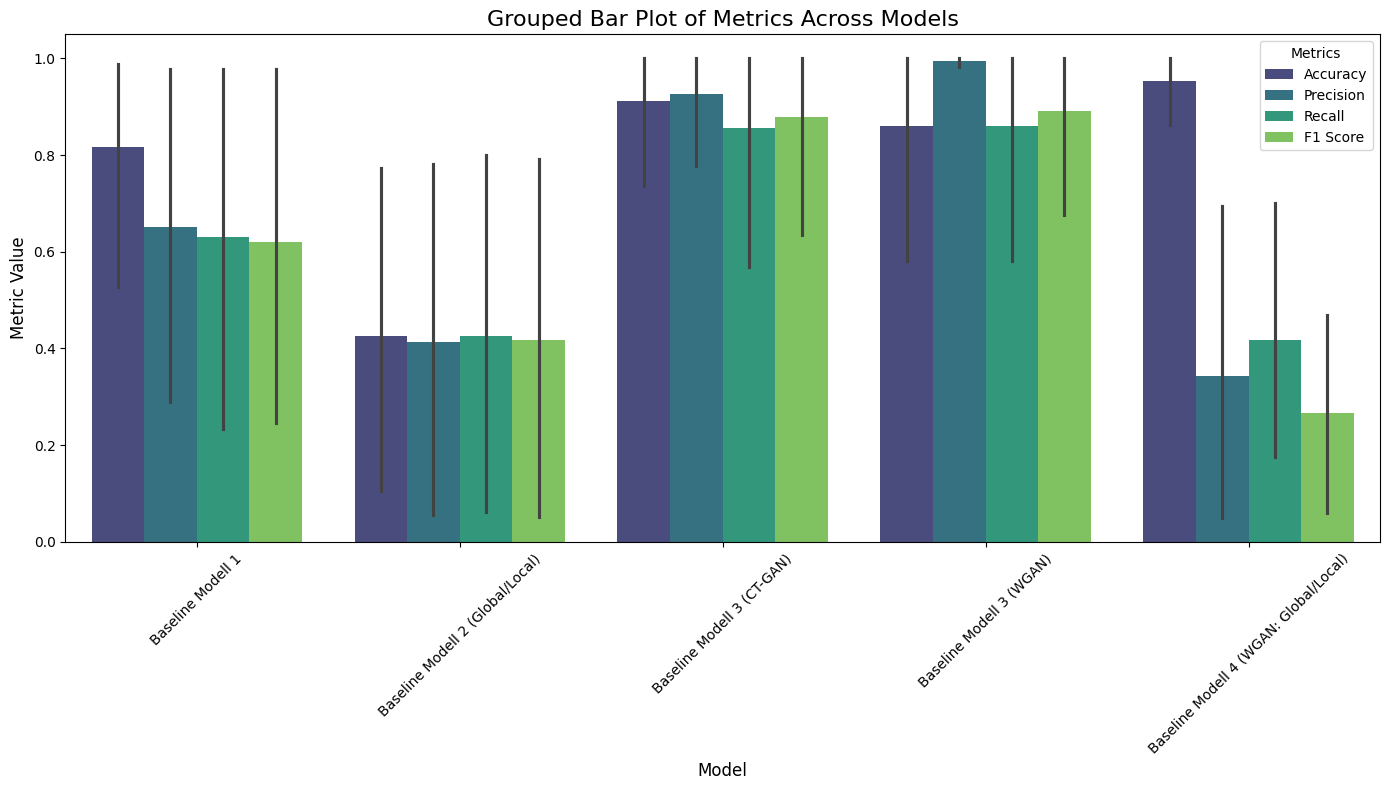

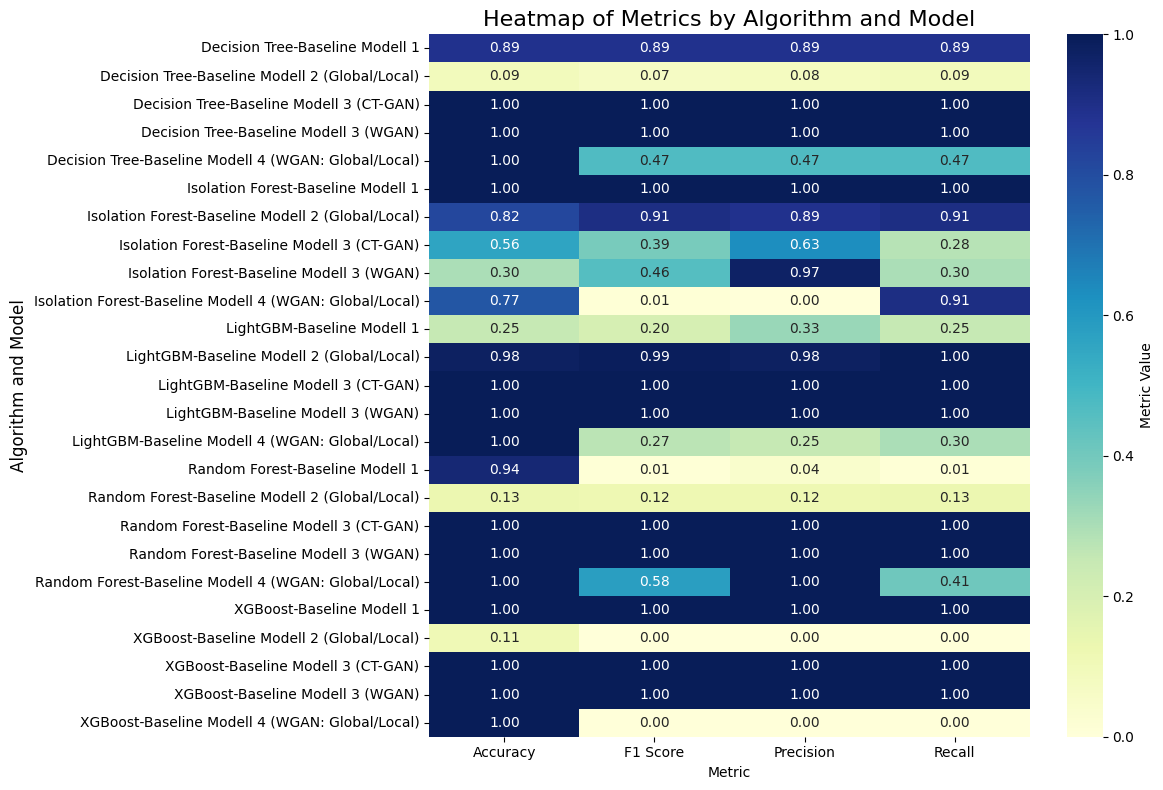

KeyError: 'Model'

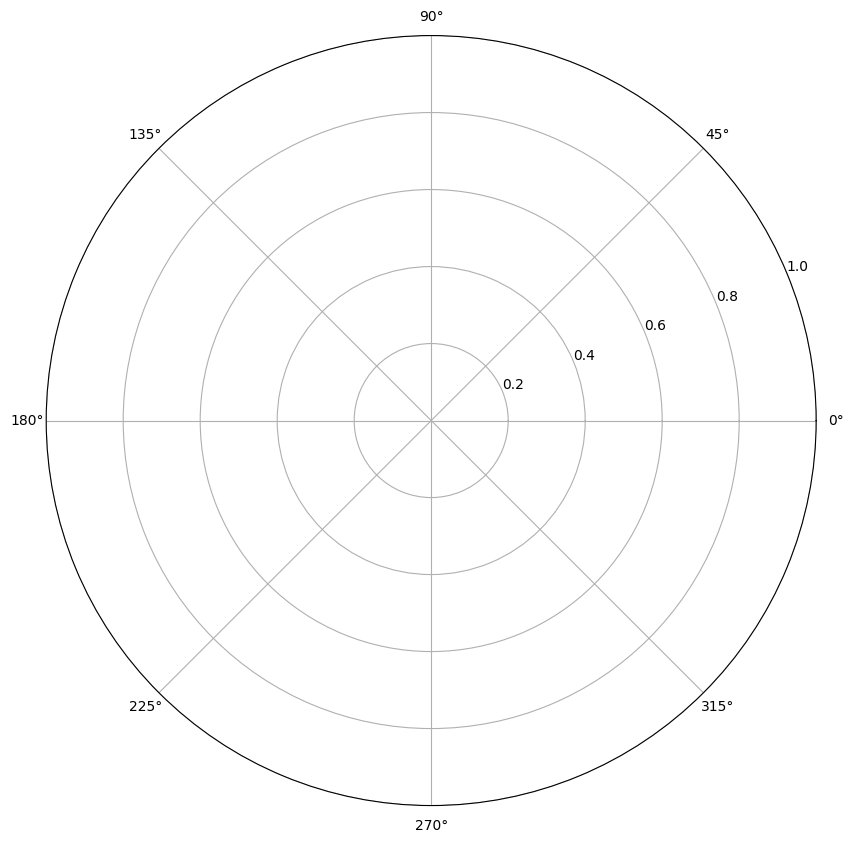

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Grouped bar plot
fig, ax = plt.subplots(figsize=(14, 8))
sns.barplot(
    data=df,
    x="Model",
    y="Value",
    hue="Metric",
    palette="viridis",
    ax=ax
)
plt.title("Grouped Bar Plot of Metrics Across Models", fontsize=16)
plt.xlabel("Model", fontsize=12)
plt.ylabel("Metric Value", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title="Metrics", fontsize=10)
plt.tight_layout()
plt.show()

# Heatmap
heatmap_data = df.pivot_table(index=["Algorithm", "Model"], columns="Metric", values="Value")
plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".2f",
    cmap="YlGnBu",
    cbar_kws={"label": "Metric Value"}
)
plt.title("Heatmap of Metrics by Algorithm and Model", fontsize=16)
plt.ylabel("Algorithm and Model", fontsize=12)
plt.tight_layout()
plt.show()

# Radar plot preparation
unique_models = df["Model"].unique()
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False).tolist()
angles += angles[:1]  # Close the circle

fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(111, polar=True)

for model in unique_models:
    # Grouping by 'Metric' and taking the mean before pivoting to avoid duplicate index entries
    model_data = df[df["Model"] == model].groupby("Metric")["Value"].mean().reset_index()
    values = model_data.pivot(index="Metric", columns="Model", values="Value")[model].tolist() # Selecting values for current model
    values += values[:1]  # Close the circle
    ax.plot(angles, values, label=model)
    ax.fill(angles, values, alpha=0.25)

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1], metrics, fontsize=12)
plt.title("Radar Plot of Metrics by Model", fontsize=16, y=1.1)
plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1), fontsize=10)
plt.tight_layout()
plt.show()


## Aggregierte Radar-Plot-Darstellung der Metriken für jedes Modell

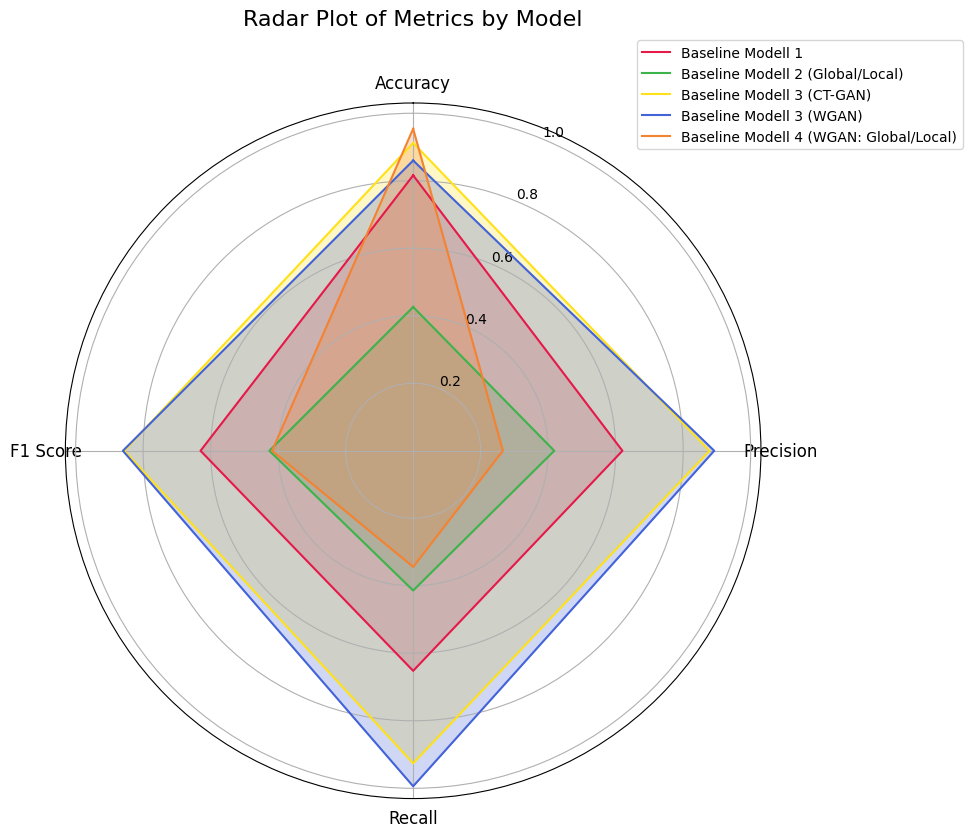

In [ ]:
# Aggregating the data for radar plot (avoiding duplicates by averaging metric values per model)
radar_data = df.groupby(["Model", "Metric"])['Value'].mean().unstack()

# Preparing the radar plot
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(111, polar=True)

# Define a color palette
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000']

# Plot data with custom colors
for i, model in enumerate(radar_data.index):
    values = radar_data.loc[model].values.flatten().tolist()
    values += values[:1]  # Close the circle
    ax.plot(angles, values, label=model, color=colors[i % len(colors)]) # Assign color based on index
    ax.fill(angles, values, alpha=0.25, color=colors[i % len(colors)]) # Fill with same color

# Setting radar plot parameters
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1], metrics, fontsize=12)
plt.title("Radar Plot of Metrics by Model", fontsize=16, y=1.1)
plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1), fontsize=10)
plt.tight_layout()
plt.show()

## Chicago Dataset

##  Datenkorrektur und Erstellung einer DataFrame für Visualisierung

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data
data = {
    "Algorithm": ["XGBoost", "XGBoost", "XGBoost", "XGBoost", "XGBoost",
                  "Random Forest", "Random Forest", "Random Forest", "Random Forest", "Random Forest",
                  "LightGBM", "LightGBM", "LightGBM", "LightGBM", "LightGBM",
                  "Isolation Forest", "Isolation Forest", "Isolation Forest", "Isolation Forest", "Isolation Forest",
                  "Decision Tree", "Decision Tree", "Decision Tree", "Decision Tree", "Decision Tree"],
    "Model": ["Baseline 1", "Baseline 2 (Global/Local)", "Baseline 3 (CT-GAN)", "Baseline 3 (WGAN)", "Baseline 4 (WGAN: Global/Local)",
              "Baseline 1", "Baseline 2 (Global/Local)", "Baseline 3 (CT-GAN)", "Baseline 3 (WGAN)", "Baseline 4 (WGAN: Global/Local)",
              "Baseline 1", "Baseline 2 (Global/Local)", "Baseline 3 (CT-GAN)", "Baseline 3 (WGAN)", "Baseline 4 (WGAN: Global/Local)",
              "Baseline 1", "Baseline 2 (Global/Local)", "Baseline 3 (CT-GAN)", "Baseline 3 (WGAN)", "Baseline 4 (WGAN: Global/Local)",
              "Baseline 1", "Baseline 2 (Global/Local)", "Baseline 3 (CT-GAN)", "Baseline 3 (WGAN)", "Baseline 4 (WGAN: Global/Local)"],
    "Accuracy": [1.0, 1.0, 1.0, 1.0, 1.0,
                 1.0, 0.9984, 1.0, 0.97, 0.99,
                 1.0, 0.3371, 1.0, 1.0, 0.98,
                 0.0964, 0.1002, 0.52, 0.34, 1.0,
                 1.0, 1.0, 1.0, 0.99, 1.0],
    "Precision": [1.0, 1.0, 1.0, 1.0, 0.18,
                  1.0, 0.9984, 1.0, 0.97, 0.94,
                  1.0, 0.4222, 1.0, 1.0, 0.02,
                  0.8742, 0.9941, 0.61, 0.97, 1.0,
                  1.0, 1.0, 1.0, 1.0, 0.58],
    "Recall": [1.0, 1.0, 1.0, 1.0, 0.06,
               1.0, 0.9984, 1.0, 0.99, 0.94,
               1.0, 0.3371, 1.0, 1.0, 0.33,
               0.0964, 0.1002, 0.14, 0.34, 0.44,
               1.0, 1.0, 1.0, 1.0, 0.44],
    "F1 Score": [1.0, 1.0, 1.0, 1.0, 0.09,
                 1.0, 0.9983, 1.0, 0.98, 0.98,
                 1.0, 0.3361, 1.0, 1.0, 0.03,
                 0.1620, 0.1805, 0.23, 0.51, 0.61,
                 1.0, 1.0, 1.0, 1.0, 0.50]
}

df = pd.DataFrame(data)

## Radar-Plot-Matrix: Vergleich von Metriken für Modelle nach Algorithmen

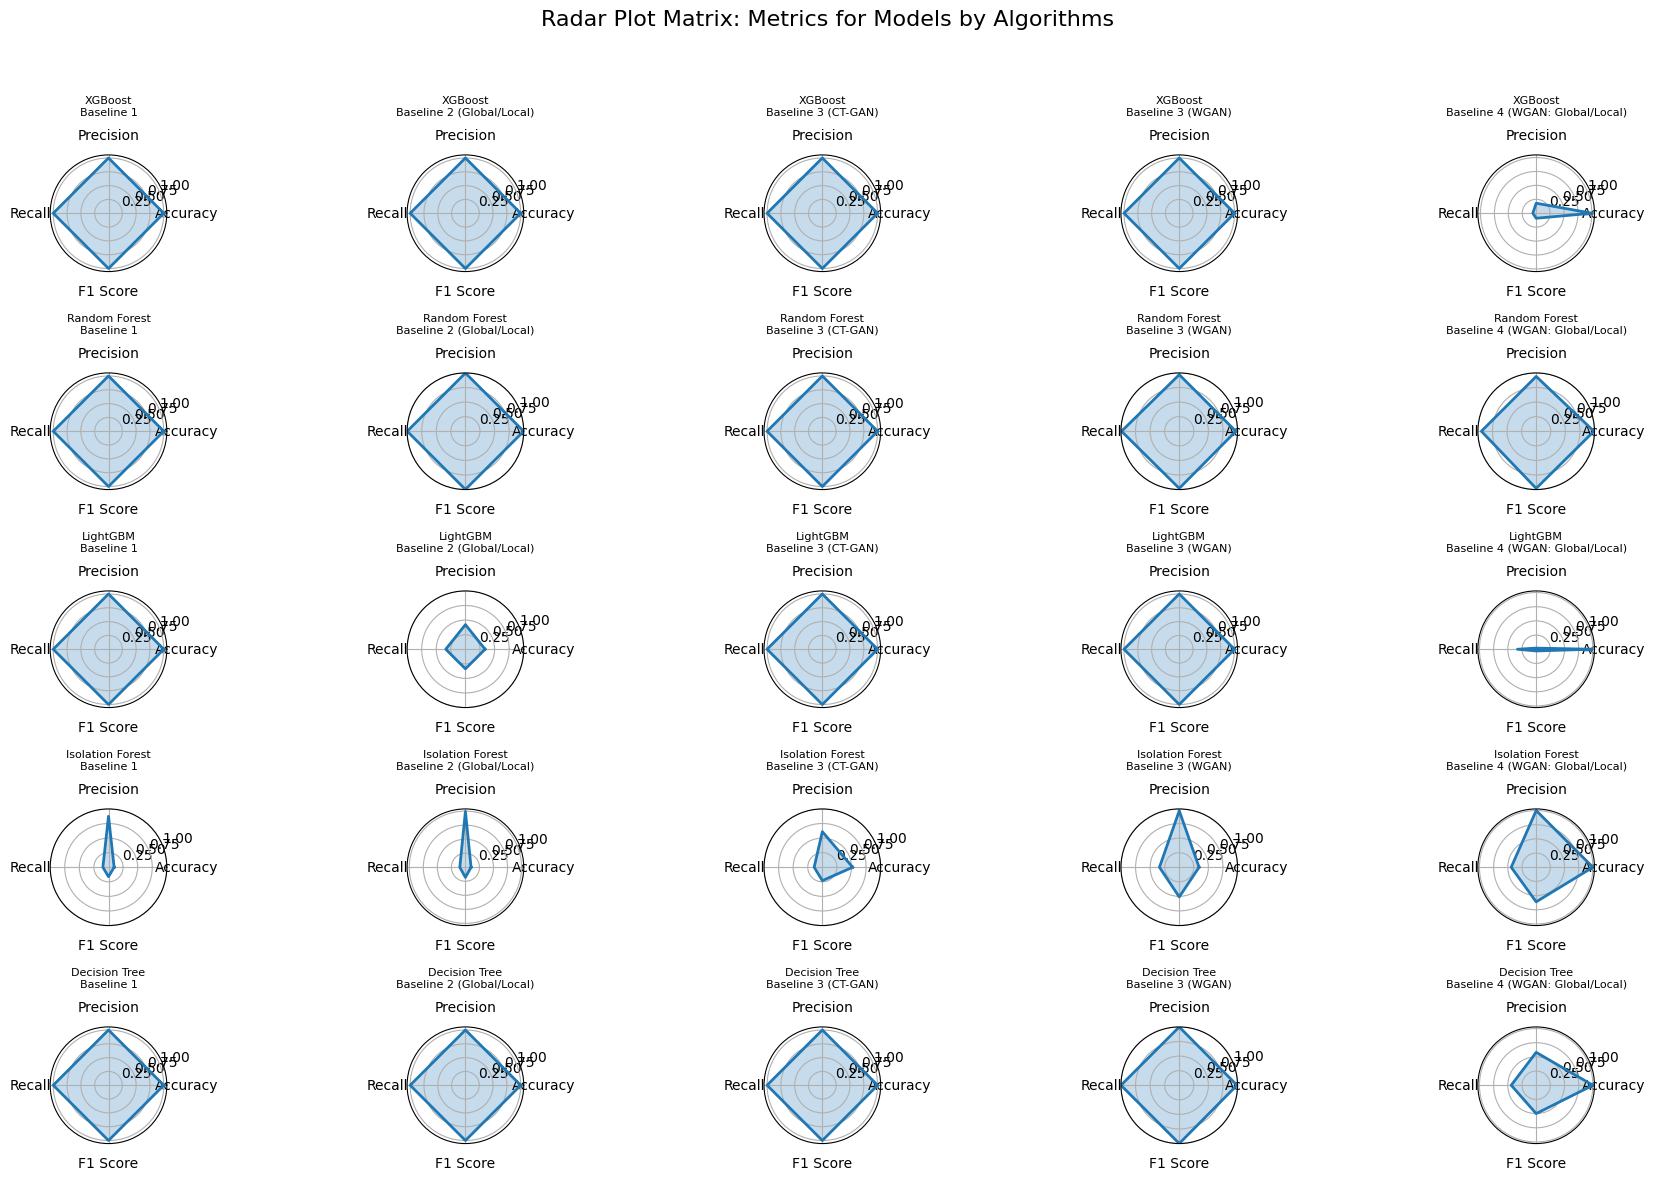

In [ ]:
from math import pi

# Prepare data for radar plot
categories = ["Accuracy", "Precision", "Recall", "F1 Score"]
algorithms = df["Algorithm"].unique()
models = df["Model"].unique()

# Create a matrix for radar plots: rows -> algorithms, columns -> models
fig, axes = plt.subplots(len(algorithms), len(models), figsize=(18, 12), subplot_kw={"polar": True})
fig.suptitle("Radar Plot Matrix: Metrics for Models by Algorithms", fontsize=16)

for i, algo in enumerate(algorithms):
    for j, model in enumerate(models):
        ax = axes[i, j]

        # Subset data for the current algorithm and model
        subset = df[(df["Algorithm"] == algo) & (df["Model"] == model)]
        if not subset.empty:
            values = subset[categories].values.flatten().tolist()
            values += values[:1]  # Close the radar chart loop
        else:
            values = [0] * len(categories)
            values += values[:1]

        # Radar chart setup
        angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
        angles += angles[:1]

        # Plot
        ax.fill(angles, values, alpha=0.25)
        ax.plot(angles, values, linewidth=2)
        ax.set_yticks([0.25, 0.5, 0.75, 1.0])
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(categories)
        ax.set_title(f"{algo}\n{model}", fontsize=8, pad=10)
        ax.grid(True)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


## Radar-Plot zur Visualisierung der Metriken nach Modellen

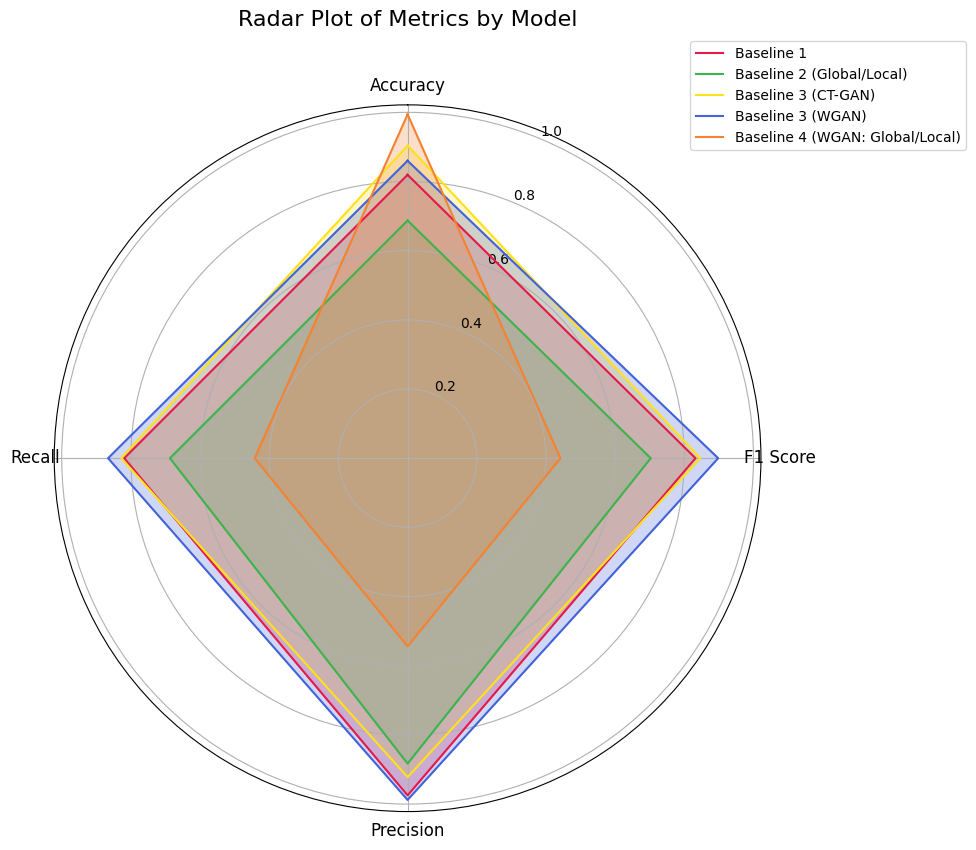

In [ ]:
# Prepare aggregated data for radar plot
df_melted = df.melt(id_vars=["Model"], value_vars=["Accuracy", "Precision", "Recall", "F1 Score"],
                    var_name="Metric", value_name="Value")
radar_data = df_melted.groupby(["Model", "Metric"])["Value"].mean().unstack()

# Prepare the radar plot
categories = radar_data.columns.tolist()
angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]  # Close the radar chart loop

# Radar plot setup
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(111, polar=True)

# Define a color palette
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231',
          '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe']

# Plot data for each model
for i, model in enumerate(radar_data.index):
    values = radar_data.loc[model].values.flatten().tolist()
    values += values[:1]  # Close the circle
    ax.plot(angles, values, label=model, color=colors[i % len(colors)])  # Assign color based on index
    ax.fill(angles, values, alpha=0.25, color=colors[i % len(colors)])  # Fill with same color

# Setting radar plot parameters
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1], categories, fontsize=12)
plt.title("Radar Plot of Metrics by Model", fontsize=16, y=1.1)
plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1), fontsize=10)
plt.tight_layout()
plt.show()
